# Spaceship Titanic with TF Decision forerst

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2024-10-01 16:09:24.632341: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 1. Import dataset

In [3]:
dataset_df = pd.read_csv("data/train.csv")
print(f"Full train dataset shape is {dataset_df.shape}")

Full train dataset shape is (8693, 14)


### 1.1 Data exploration

In [4]:
dataset_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
dataset_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [6]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
dataset_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


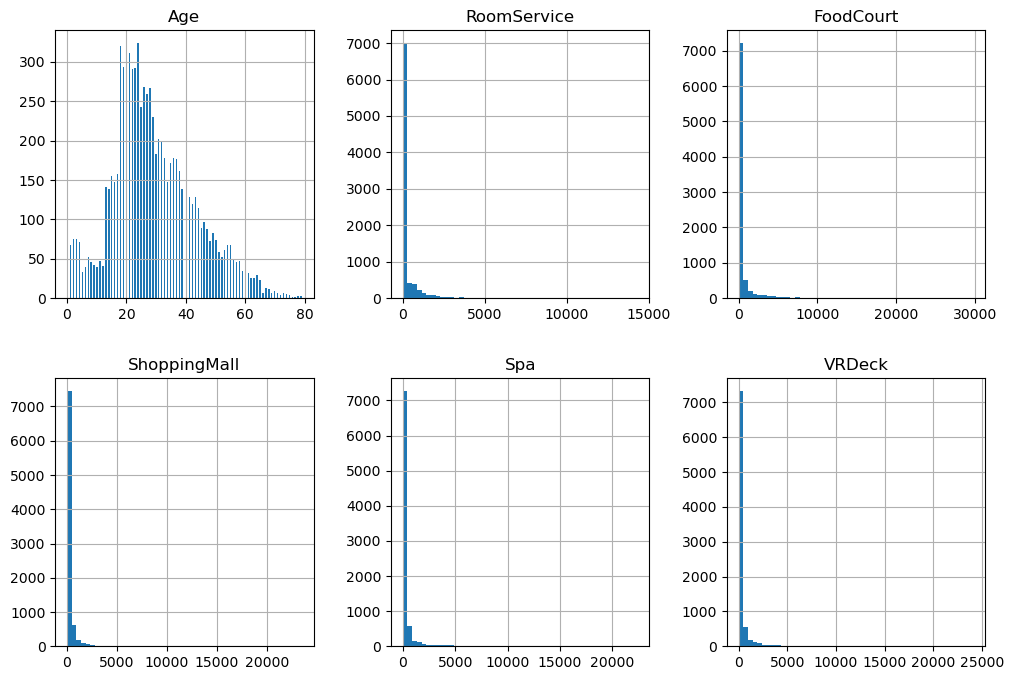

In [8]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()
dataset_df.hist("Age", bins=160, ax=axes[0])
dataset_df.hist("RoomService", bins=50, ax=axes[1])
dataset_df.hist("FoodCourt", bins=50, ax=axes[2])
dataset_df.hist("ShoppingMall", bins=50, ax=axes[3])
dataset_df.hist("Spa", bins=50, ax=axes[4])
dataset_df.hist("VRDeck", bins=50, ax=axes[5])

plt.show()

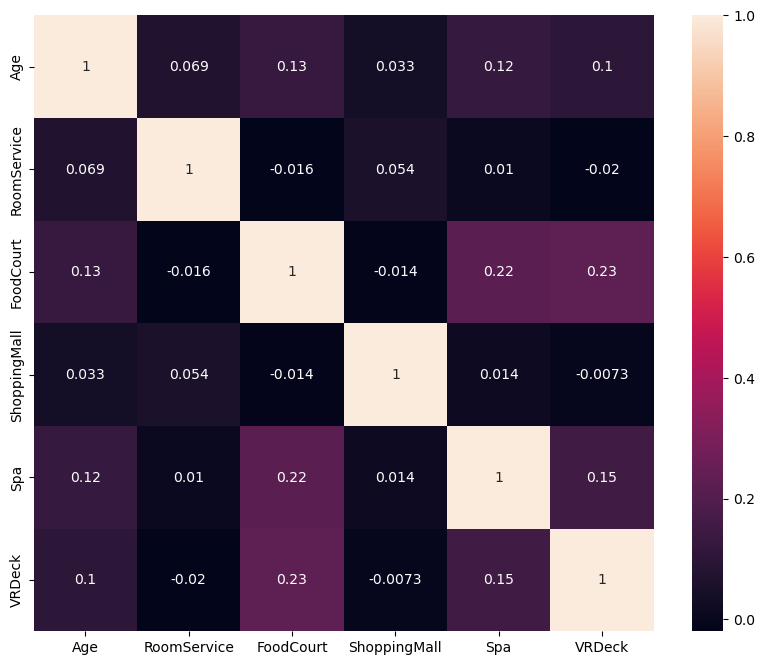

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    data=dataset_df[dataset_df.select_dtypes(include=[float]).columns].corr(),
    annot=True,
)
plt.show()

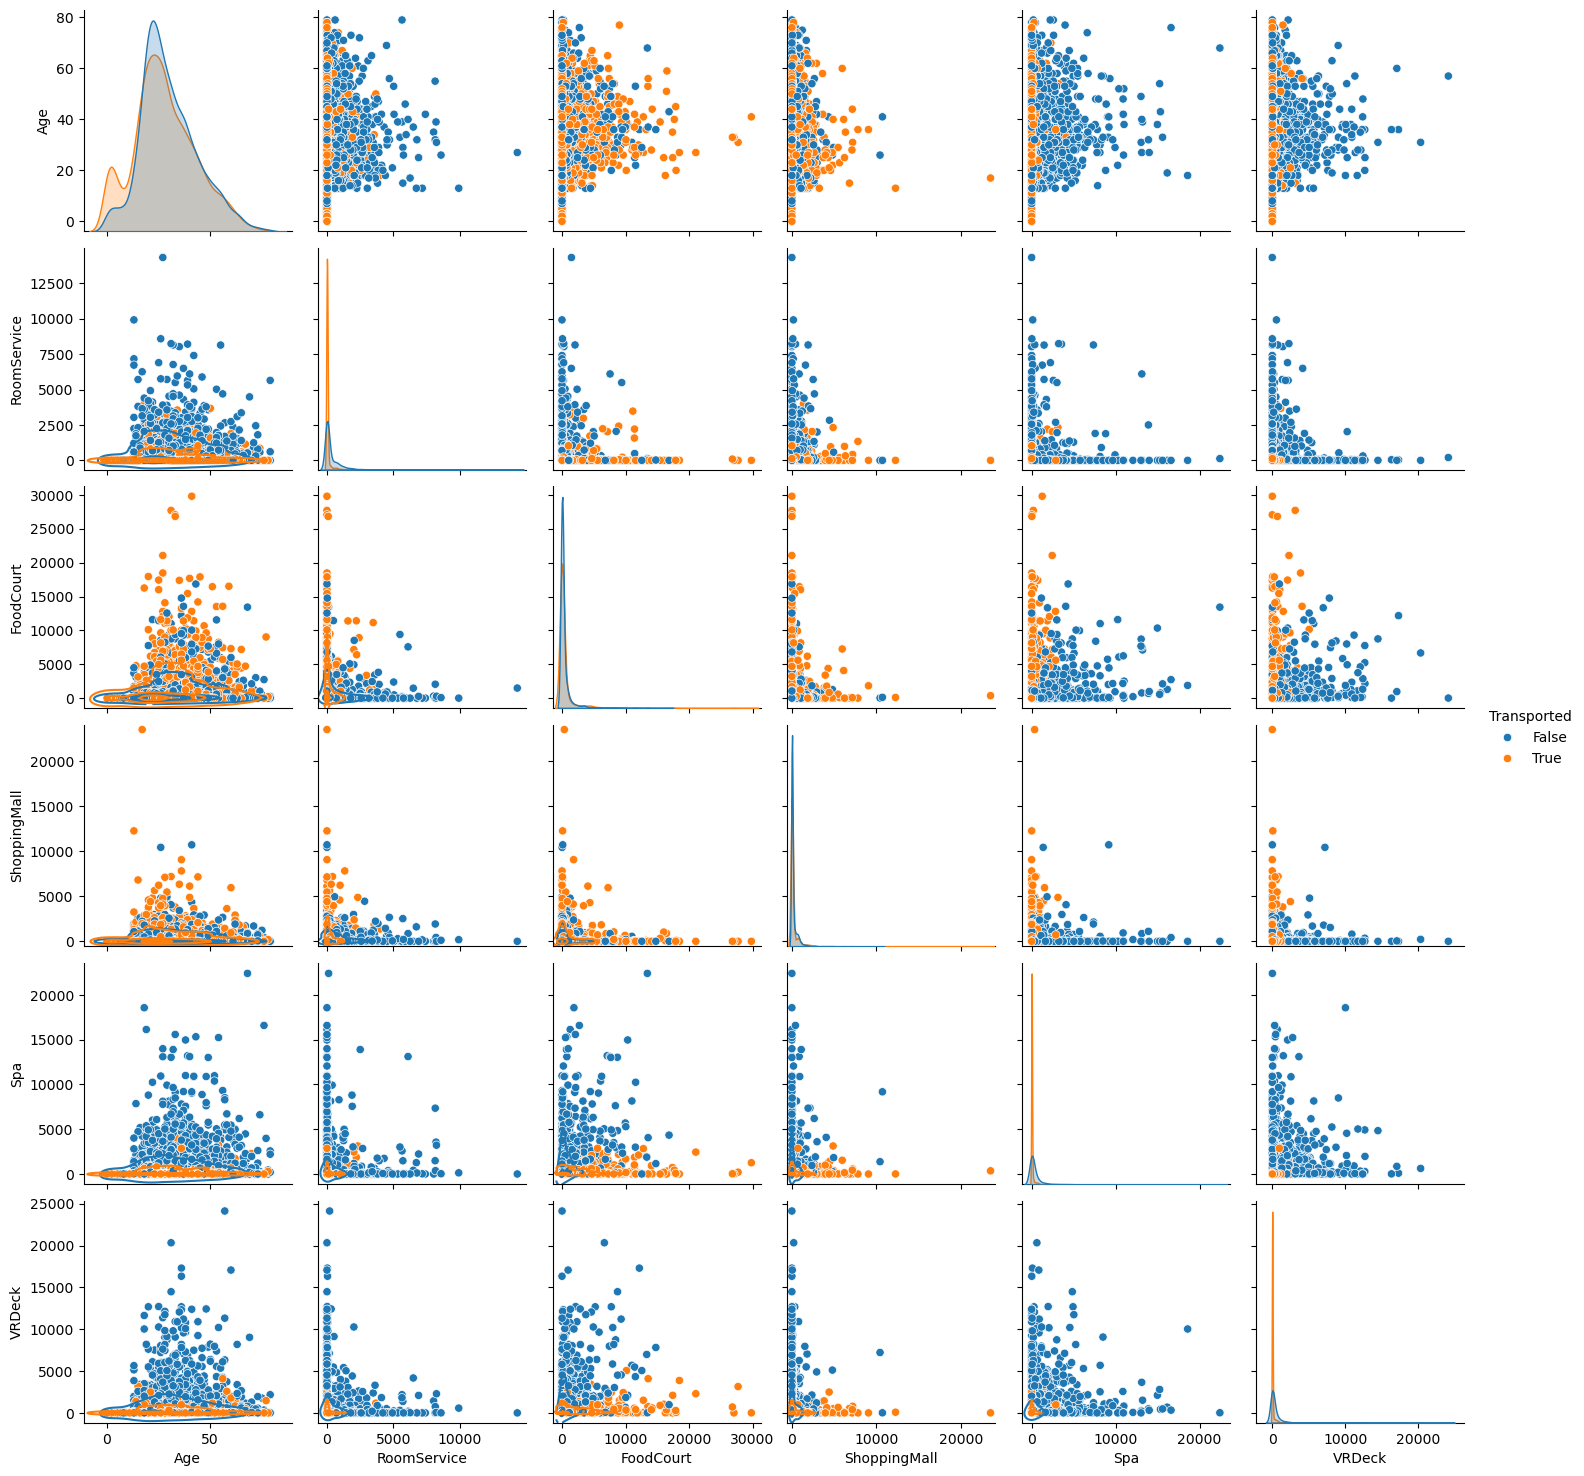

In [10]:
g = sns.pairplot(
    dataset_df,
    hue="Transported",
    vars=["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"],
)
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()


Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
- `PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
- `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- `Destination` - The planet the passenger will be debarking to.
- `Age` - The age of the passenger.
- `VIP` - Whether the passenger has paid for special VIP service during the voyage.
- `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- `Name` - The first and last names of the passenger.
- `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

### Impact of caterorical values

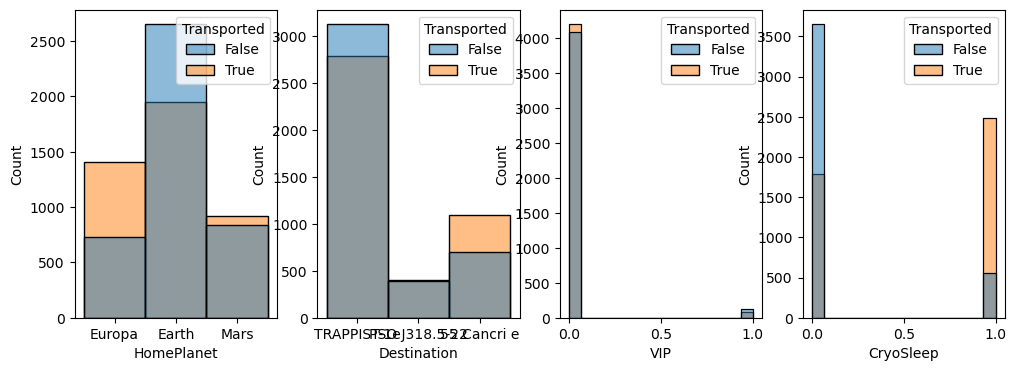

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
sns.histplot(data=dataset_df, x="HomePlanet", hue="Transported", ax=ax[0])
sns.histplot(data=dataset_df, x="Destination", hue="Transported", ax=ax[1])
sns.histplot(data=dataset_df, x="VIP", hue="Transported", ax=ax[2])
sns.histplot(data=dataset_df, x="CryoSleep", hue="Transported", ax=ax[3])
plt.show()


In [12]:
# Cabin split
cabin_data = dataset_df[["Transported", "Cabin"]].copy()
cabin_data[["Deck", "Cabin_num", "Side"]] = dataset_df["Cabin"].str.split(
    "/", expand=True
)
cabin_data.head()


,Transported,Cabin,Deck,Cabin_num,Side
0,False,B/0/P,B,0,P
1,True,F/0/S,F,0,S
2,False,A/0/S,A,0,S
3,False,A/0/S,A,0,S
4,True,F/1/S,F,1,S


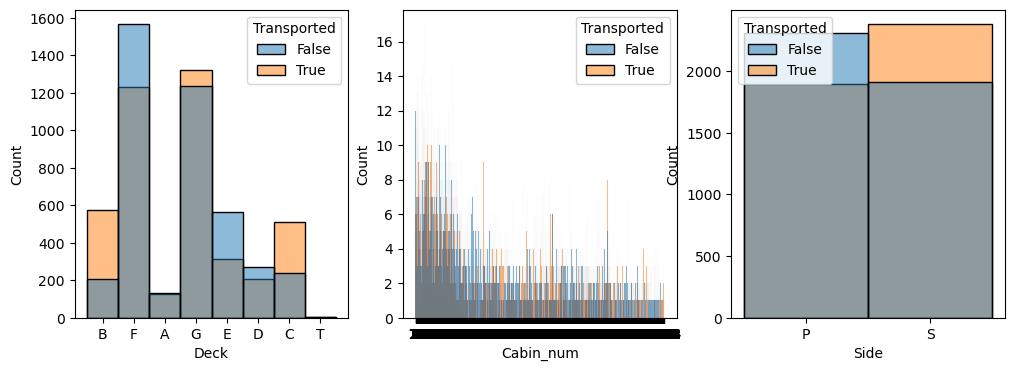

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
sns.histplot(data=cabin_data, x="Deck", hue="Transported", ax=axes[0])
sns.histplot(data=cabin_data, x="Cabin_num", hue="Transported", ax=axes[1])
sns.histplot(data=cabin_data, x="Side", hue="Transported", ax=axes[2])
plt.show()

<Axes: xlabel='Deck', ylabel='Side'>

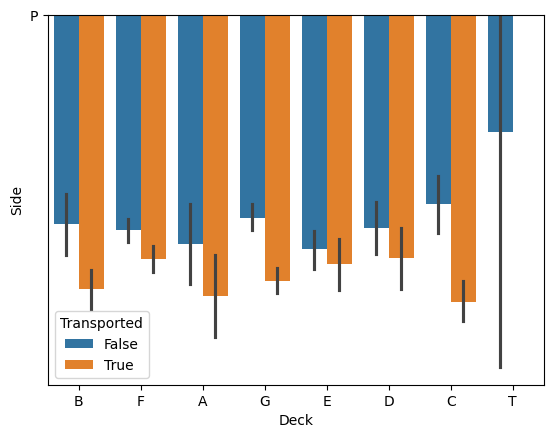

In [14]:
sns.barplot(data=cabin_data, x="Deck", y="Side", hue="Transported")

> We do have a variance in all this variables. Let's keep them for the training.

### Impact of group travelling

In [15]:
group_tvl = dataset_df[["PassengerId", "Transported"]]
group_tvl = group_tvl.assign(
    Group=group_tvl["PassengerId"].str.split("_", expand=True)[0],
    IdInGroup=group_tvl["PassengerId"].str.split("_", expand=True)[1],
)
# group_tvl[["Group", "Id_in_Group"]] = group_tvl["PassengerId"].str.split("_", expand=True)
# group_tvl["InGroup"] = group_tvl["Group"].is_unique
group_tvl.loc[:, "InGroup"] = group_tvl["Group"].duplicated(keep=False)
group_tvl.head()

,PassengerId,Transported,Group,IdInGroup,InGroup
0,0001_01,False,0001,01,False
1,0002_01,True,0002,01,False
2,0003_01,False,0003,01,True
3,0003_02,False,0003,02,True
4,0004_01,True,0004,01,False


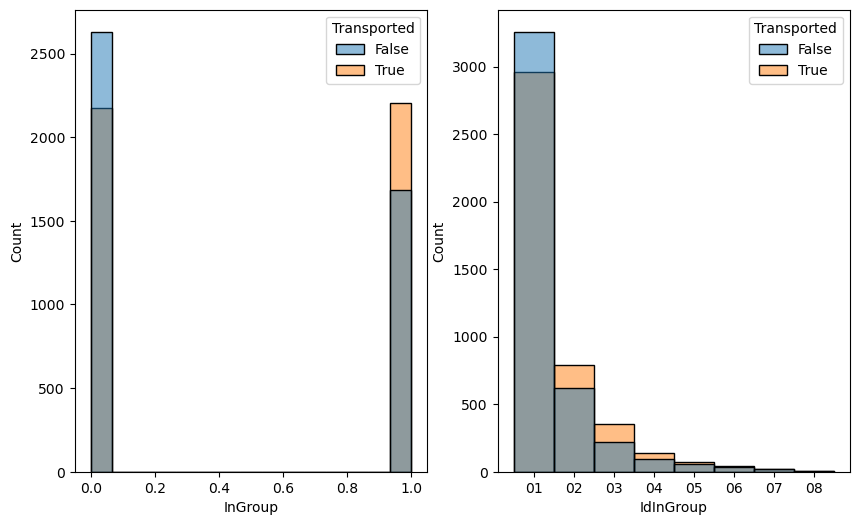

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
sns.histplot(data=group_tvl, x="InGroup", hue="Transported", ax=axes[0])
sns.histplot(data=group_tvl, x="IdInGroup", hue="Transported", ax=axes[1])
plt.show()

In [53]:
# Do we have a passenger part of a group with missing values ?
group_exam = pd.merge(
    dataset_df, group_tvl[["PassengerId", "Group", "InGroup"]], on="PassengerId"
)
group_exam["HomePlanet"] = group_exam["HomePlanet"].fillna("ukn")
group_from = (
    group_exam[group_exam["InGroup"]]
    .groupby(by="Group", dropna=False)["HomePlanet"]
    .apply(set)
    .to_frame()
)
group_from["Nb_HomePlanet"] = group_from["HomePlanet"].apply(len)
filtered = group_from.loc[group_from["Nb_HomePlanet"] == 2]
print(filtered.to_string)


<bound method DataFrame.to_string of           HomePlanet  Nb_HomePlanet
Group                              
0064     {ukn, Mars}              2
0119   {Europa, ukn}              2
0444     {ukn, Mars}              2
0445    {ukn, Earth}              2
0470     {ukn, Mars}              2
...              ...            ...
8938     {ukn, Mars}              2
8961    {ukn, Earth}              2
9030    {ukn, Earth}              2
9072     {ukn, Mars}              2
9194   {Europa, ukn}              2

[89 rows x 2 columns]>


In [54]:
# Display the entire DataFrame just once
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(filtered)

,HomePlanet,Nb_HomePlanet
Group,,
0064,"{ukn, Mars}",2
0119,"{Europa, ukn}",2
0444,"{ukn, Mars}",2
0445,"{ukn, Earth}",2
0470,"{ukn, Mars}",2
0504,"{Europa, ukn}",2
0539,"{Europa, ukn}",2
0540,"{ukn, Mars}",2
0560,"{ukn, Earth}",2


In [58]:
group_to

,Destination
Group,
0003,{TRAPPIST-1e}
0006,{TRAPPIST-1e}
0008,"{TRAPPIST-1e, 55 Cancri e}"
0017,"{TRAPPIST-1e, 55 Cancri e}"
0020,"{TRAPPIST-1e, 55 Cancri e, PSO J318.5-22}"
...,...
9252,{55 Cancri e}
9267,{TRAPPIST-1e}
9272,{TRAPPIST-1e}


In [59]:
group_to = (
    group_exam[group_exam["InGroup"]]
    .groupby(by="Group", dropna=False)["Destination"]
    .apply(set)
    .to_frame()
)
group_to["Nb_Destination"] = group_to["Destination"].apply(len)
filtered_dest = group_to.loc[group_to["Nb_Destination"] > 1]
# Display the entire DataFrame just once
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    display(filtered_dest)

,Destination,Nb_Destination
Group,,
0008,"{TRAPPIST-1e, 55 Cancri e}",2
0017,"{TRAPPIST-1e, 55 Cancri e}",2
0020,"{TRAPPIST-1e, 55 Cancri e, PSO J318.5-22}",3
0044,"{TRAPPIST-1e, 55 Cancri e, PSO J318.5-22}",3
0045,"{TRAPPIST-1e, nan}",2
0067,"{TRAPPIST-1e, 55 Cancri e, PSO J318.5-22}",3
0099,"{TRAPPIST-1e, PSO J318.5-22}",2
0103,"{TRAPPIST-1e, 55 Cancri e}",2
0138,"{TRAPPIST-1e, nan}",2


## 2. Data cleaning pipeline

Troubles to address:
- [ ] --ages with sub numbers--
- [X] remove names
- [ ] --merge the numeric to simplify ?--
- [X] split the room number
- [X] transform the booleans to int(+1/-1) with unk value to 0
- [X] replace missing data
    1.   HomePlanet ;   8492 non-null  ; object   -> ukn
    2.   CryoSleep  ;   8476 non-null  ; object   -> False
    3.   Cabin      ;   8494 non-null  ; object   -> ??
    4.   Destination ;  8511 non-null  ; object   -> ukn
    5.   Age         ;  8514 non-null  ; float64  -> mean
    6.   VIP         ;  8490 non-null  ; object   -> 0
    7.   RoomService ;  8512 non-null  ; float64  -> 0.0
    8.   FoodCourt   ;  8510 non-null  ; float64  -> 0.0
    9.   ShoppingMall ; 8485 non-null  ; float64  -> 0.0
    10.  Spa          ; 8510 non-null  ; float64  -> 0.0
    11.  VRDeck       ; 8505 non-null  ; float64  -> 0.0
    12.  Name         ; 8493 non-null  ; object   -> remove

- the missing HomePlanet could be replaced by the one of the group.
- the missing Destination ...


In [60]:
def data_cleaning_pipeline(train_data: pd.DataFrame) -> tuple[pd.DataFrame, ...]:
    """
    Prepare the data before it can be used in the model.
    Aims to be used for training and testing data, so drop no row.

    expected columns = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported']
    """
    # copy the entry
    train_data = train_data.copy(deep=True)
    # Split the data id / train data / label (if present)
    passenger_id_df = train_data["PassengerId"]
    # The categorical label to predict : 1 Transported, 0 sill on board
    if "Transported" in train_data.columns:
        train_label_df = train_data["Transported"].map({True: 1, False: 0}).astype(int)
    else:
        train_label_df = None

    # Passenger Id_split
    train_data = train_data.assign(
        Group=group_tvl["PassengerId"].str.split("_", expand=True)[0],
        IdInGroup=group_tvl["PassengerId"].str.split("_", expand=True)[1].astype(int),
    )
    train_data.loc[:, "InGroup"] = train_data["Group"].duplicated(keep=False)

    # Fill missing numeric values with 0.0
    train_data[["FoodCourt", "ShoppingMall", "Spa", "VRDeck", "RoomService"]] = (
        train_data[
            ["FoodCourt", "ShoppingMall", "Spa", "VRDeck", "RoomService"]
        ].fillna(value=0)
    )
    # Sum them then normalize
    # train_data["ServiceFare"] = (
    #     train_data["FoodCourt"]
    #     + train_data["ShoppingMall"]
    #     + train_data["Spa"]
    #     + train_data["VRDeck"]
    #     + train_data["RoomService"]
    # )
    # train_data["ServiceFare"] = (
    #     train_data["ServiceFare"] / train_data["ServiceFare"].max()
    # )

    # Transform booleans to int (+1/-1) with 0 for missing values
    train_data["CryoSleep"] = (
        train_data["CryoSleep"].map({True: 1, False: -1}).fillna(0).astype(int)
    )
    train_data["VIP"] = (
        train_data["VIP"].map({True: 1, False: -1}).fillna(0).astype(int)
    )
    train_data["InGroup"] = (
        train_data["InGroup"].map({True: 1, False: -1}).fillna(0).astype(int)
    )

    # Fill missing categorical values with "unk"
    train_data[["HomePlanet"]] = train_data[["Destination"]].fillna(value="fm_unk")
    train_data[["Destination"]] = train_data[["Destination"]].fillna(value="to_unk")

    # Age replaced by the mean
    train_data[["Age"]] = train_data[["Age"]].fillna(value=train_data["Age"].mean())

    # Fill missing Cabin value with 'U/0/U'
    train_data["Cabin"] = train_data["Cabin"].fillna(value="U/0/U")
    # Cabin split
    train_data[["Deck", "Cabin_num", "Side"]] = train_data["Cabin"].str.split(
        "/", expand=True
    )

    # Drop the columns unused in the training
    print(train_data.columns)
    col_to_drop = ["Transported", "Name", "PassengerId", "Group", "Cabin", "Cabin_num"]
    for col_name in col_to_drop:
        try:
            train_data = train_data.drop(columns=col_name)
        except KeyError:
            print(f"Column {col_name} not in dataset")

    return passenger_id_df, train_data, train_label_df

In [61]:
_, X, y = data_cleaning_pipeline(dataset_df)
X.info()

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Group', 'IdInGroup', 'InGroup', 'Deck',
       'Cabin_num', 'Side'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   int64  
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   int64  
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  IdInGroup     8693 non-null   int64  
 11  InGroup       8693 non-null   int64  
 12  Deck     

In [62]:
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,IdInGroup,InGroup,Deck,Side
0,TRAPPIST-1e,-1,TRAPPIST-1e,39.0,-1,0.0,0.0,0.0,0.0,0.0,1,-1,B,P
1,TRAPPIST-1e,-1,TRAPPIST-1e,24.0,-1,109.0,9.0,25.0,549.0,44.0,1,-1,F,S
2,TRAPPIST-1e,-1,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,1,1,A,S
3,TRAPPIST-1e,-1,TRAPPIST-1e,33.0,-1,0.0,1283.0,371.0,3329.0,193.0,2,1,A,S
4,TRAPPIST-1e,-1,TRAPPIST-1e,16.0,-1,303.0,70.0,151.0,565.0,2.0,1,-1,F,S


In [63]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Transported, dtype: int64

## Split and save

In [68]:
# Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [69]:
# binary columns
binary_vars = ["VIP", "CryoSleep", "InGroup"]
X_binary = X[binary_vars]

In [70]:
# One hot encoder
one_hot_encoder = OneHotEncoder(sparse_output=False)
cat_var = ["HomePlanet", "Destination", "Deck", "Side"]

one_hot_encoder.fit(X[cat_var])
X_encoded = one_hot_encoder.transform(X[cat_var])
cat_var_encoded = list(one_hot_encoder.get_feature_names_out())
X_encoded.shape

(8693, 20)

In [71]:
# Scaler
std_scaler = StandardScaler()
cont_var = list(X.select_dtypes(include=[float]).columns)

# Scale each feature independantly
X_std = std_scaler.fit_transform(X[cont_var])

X_std.shape

(8693, 6)

In [95]:
# Concatenate the three parts
X_preprocessed = np.concatenate([X_binary, X_encoded, X_std], axis=1)
all_columns = binary_vars + cat_var_encoded + cont_var
print(all_columns)
print(X_preprocessed.shape)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_preprocessed, y, test_size=0.1, stratify=y
)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

['VIP', 'CryoSleep', 'InGroup', 'HomePlanet_55 Cancri e', 'HomePlanet_PSO J318.5-22', 'HomePlanet_TRAPPIST-1e', 'HomePlanet_fm_unk', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e', 'Destination_to_unk', 'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_U', 'Side_P', 'Side_S', 'Side_U', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
(8693, 29)
(7823, 29)
(870, 29)
(7823,)
(870,)


In [ ]:
# store as CSV

## 3. Model training

### 3.1 With sklearn and XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score

In [202]:
xgb_1 = XGBClassifier(n_estimators=200, max_depth=7, learning_rate=0.1, max_leaves=3)
xgb_1.fit(X_train, y_train)
xgb_1.score(X_test, y_test)

0.7929844738355377

### Explainability

In [210]:
import shap

xpl = shap.TreeExplainer(xgb_1, X_test)
shap_values = xpl(X_test[:500])
shap_values.shape

(500, 29)

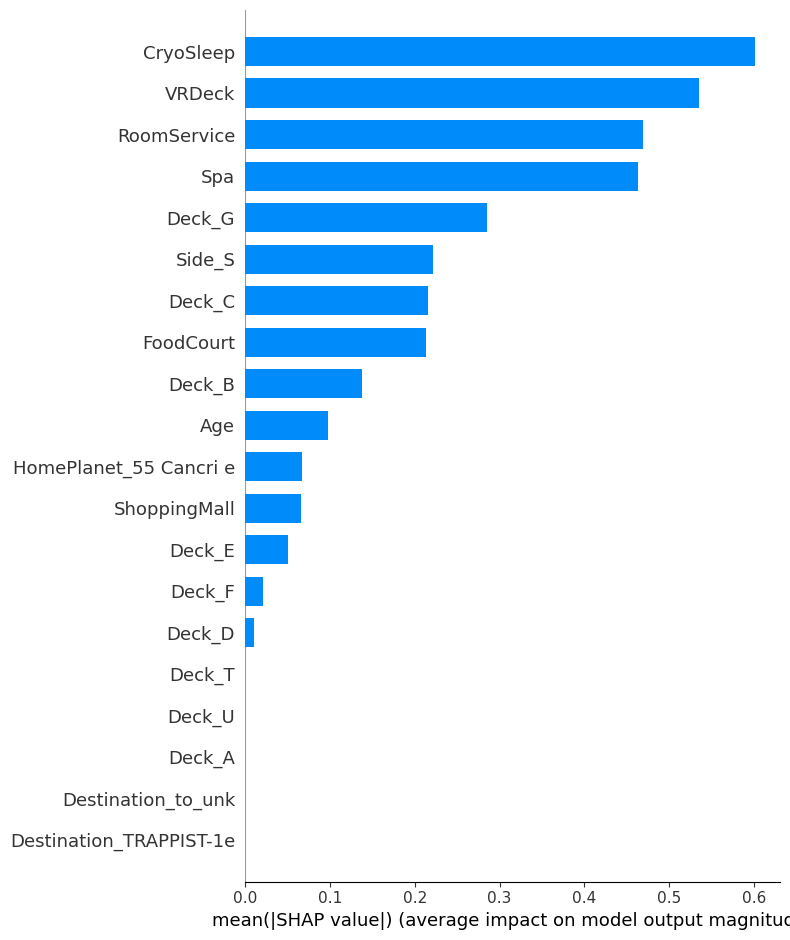

In [211]:
shap.summary_plot(shap_values, feature_names=all_columns, plot_type="bar")

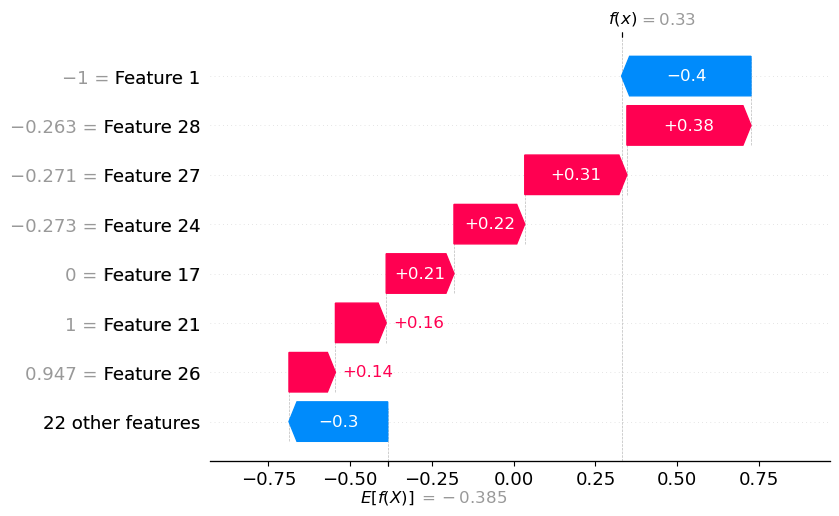

In [212]:
shap.plots.waterfall(shap_values[0], max_display=8)

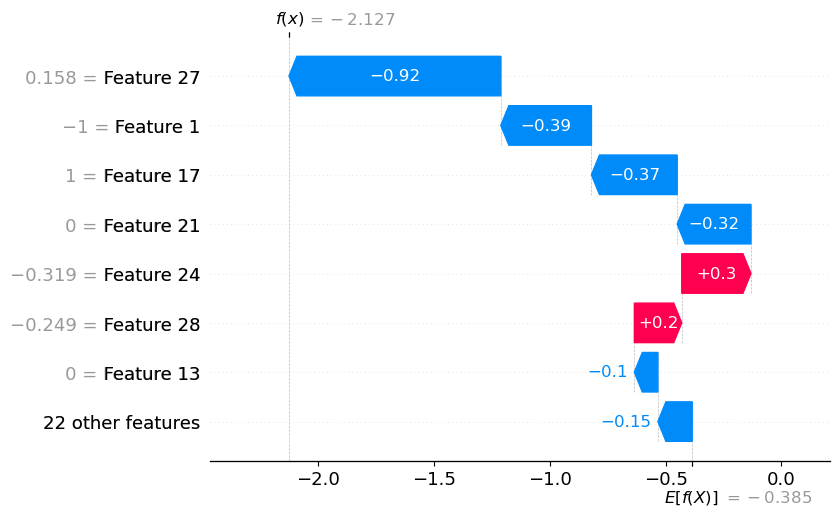

In [213]:
shap.plots.waterfall(shap_values[1], max_display=8)

In [221]:
# Train a XGBoost model

param_grid = {
    "n_estimators": [20, 50, 100, 200],
    "max_depth": [1, 3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 0.9, 1.0],
    #'colsample_bytree': [0.8, 0.9, 1.0],
    #'gamma': [0, 0.1, 0.2],
    "min_child_weight": [1, 3, 5],
    "max_leaves": [0, 10],
}
xgb = XGBClassifier()
scorer = make_scorer(f1_score)

# Use GridSerach
grid_search = GridSearchCV(
    estimator=xgb, param_grid=param_grid, scoring=scorer, cv=3, verbose=1, n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Evaluate the best model
best_model = grid_search.best_estimator_
f1_train = f1_score(y_train, best_model.predict(X_train))
f1_test = f1_score(y_test, best_model.predict(X_test))
accuracy_score_test = accuracy_score(y_test, best_model.predict(X_test))
print(f"- F1 Score (Train): \t{f1_train:.4f}")
print(f"- F1 Score (Test): \t{f1_test:.4f}")
print(f"- AccuracyScore (Test):\t{accuracy_score_test:.4f}")

Fitting 3 folds for each of 864 candidates, totalling 2592 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'max_leaves': 10, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.9}
- F1 Score (Train): 	0.8270
- F1 Score (Test): 	0.8144
- AccuracyScore (Test):	0.8045


### 3.2 Keras

In [101]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam

In [102]:
X_train.shape

(7823, 29)

#### 2 Dense hidden layers

In [114]:
# Define the model
model = Sequential(
    [
        Input((29,)),  # Input
        Dense(16, activation="relu"),
        Dense(16, activation="relu"),  # Hiden
        Dense(1, activation="sigmoid"),  # Output
    ]
)
model.compile(
    optimizer=Adam(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"]
)
nb_epochs = 500
# Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=nb_epochs,
    batch_size=512,
    validation_data=(X_test, y_test),
    verbose=1,
)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model performances: {loss=:.3f} {accuracy=:.3f}")

Epoch 1/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4669 - loss: 0.7062 - val_accuracy: 0.5851 - val_loss: 0.6742
Epoch 2/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6152 - loss: 0.6663 - val_accuracy: 0.6862 - val_loss: 0.6436
Epoch 3/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6968 - loss: 0.6357 - val_accuracy: 0.7230 - val_loss: 0.6091
Epoch 4/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7433 - loss: 0.5968 - val_accuracy: 0.7563 - val_loss: 0.5694
Epoch 5/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7627 - loss: 0.5604 - val_accuracy: 0.7759 - val_loss: 0.5313
Epoch 6/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7788 - loss: 0.5231 - val_accuracy: 0.7839 - val_loss: 0.4987
Epoch 7/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7789 - loss: 0.4919 - val_accuracy: 0.7839 - val_loss: 0.4758
Epoch 8/500
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7940 - loss: 0.4676 - val_accuracy: 0.7885 - 

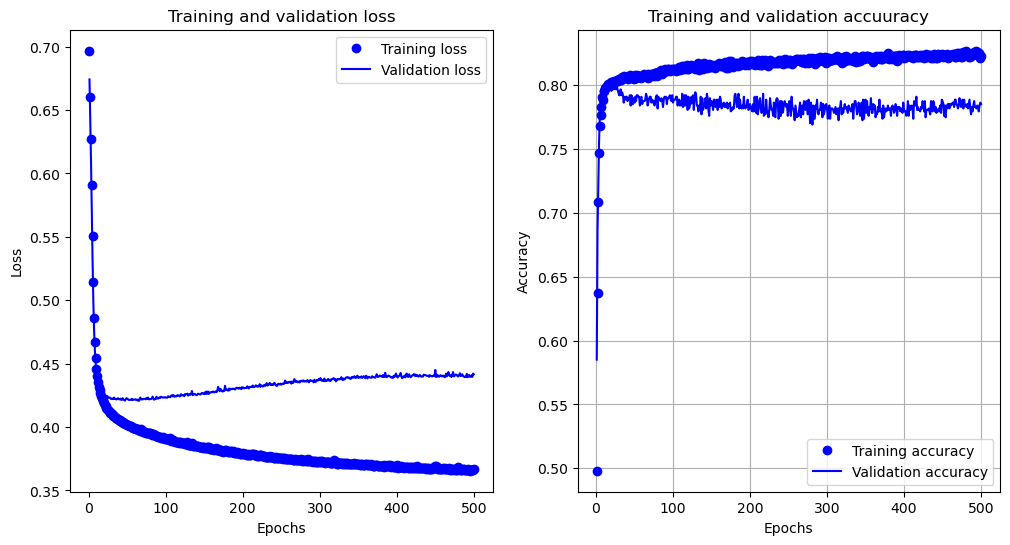

In [116]:
history_dict = history.history

epochs = range(1, nb_epochs + 1)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Loss
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
axes[0].plot(epochs, loss_values, "bo", label="Training loss")
axes[0].plot(epochs, val_loss_values, "b", label="Validation loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

# accuracy
acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]
axes[1].plot(epochs, acc_values, "bo", label="Training accuracy")
axes[1].plot(epochs, val_acc_values, "b", label="Validation accuracy")
axes[1].set_title("Training and validation accuuracy")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()
plt.grid()
plt.show()

Experiment on 500 epochs shows that the model is overfitting over 45 epochs.

### 3 dense hidden layers

In [119]:
# Define the model
model_3h = Sequential(
    [
        Input((29,)),  # Input
        Dense(32, activation="relu"),
        Dense(32, activation="relu"),
        Dense(16, activation="relu"),  # Hiden
        Dense(1, activation="sigmoid"),  # Output
    ]
)
model_3h.compile(
    optimizer=Adam(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"]
)
nb_epochs = 100
# Train the model
history_3h = model_3h.fit(
    X_train,
    y_train,
    epochs=nb_epochs,
    batch_size=512,
    validation_data=(X_test, y_test),
    verbose=1,
)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5227 - loss: 0.6910 - val_accuracy: 0.7023 - val_loss: 0.6404
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7305 - loss: 0.6191 - val_accuracy: 0.7563 - val_loss: 0.5716
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7607 - loss: 0.5516 - val_accuracy: 0.7667 - val_loss: 0.5072
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7757 - loss: 0.4935 - val_accuracy: 0.7839 - val_loss: 0.4712
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7851 - loss: 0.4672 - val_accuracy: 0.7839 - val_loss: 0.4528
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7875 - loss: 0.4536 - val_accuracy: 0.7851 - val_loss: 0.4421
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7926 - loss: 0.4359 - val_accuracy: 0.7862 - val_loss: 0.4341
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7939 - loss: 0.4269 - val_accuracy: 0.7851 - 

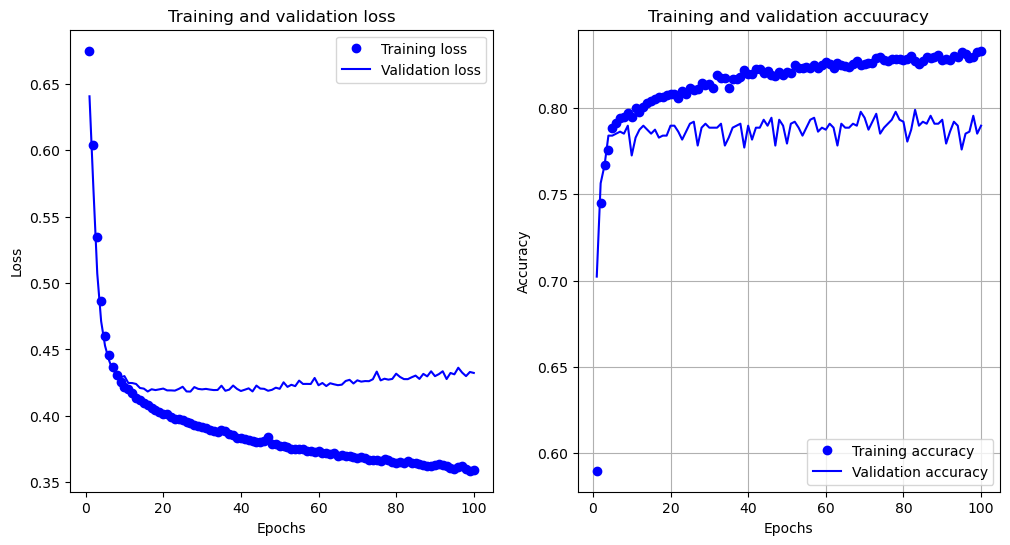

In [120]:
history_dict = history_3h.history

epochs = range(1, nb_epochs + 1)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Loss
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
axes[0].plot(epochs, loss_values, "bo", label="Training loss")
axes[0].plot(epochs, val_loss_values, "b", label="Validation loss")
axes[0].set_title("Training and validation loss")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Loss")
axes[0].legend()

# accuracy
acc_values = history_dict["accuracy"]
val_acc_values = history_dict["val_accuracy"]
axes[1].plot(epochs, acc_values, "bo", label="Training accuracy")
axes[1].plot(epochs, val_acc_values, "b", label="Validation accuracy")
axes[1].set_title("Training and validation accuuracy")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Accuracy")
axes[1].legend()
plt.grid()
plt.show()

> The larger the layers, the sooner the overfitting appears.

In [109]:
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [93]:
# Define the model
model_2 = Sequential(
    [
        Dense(29, activation="relu"),  # Input
        Dense(32, activation="relu"),  # Hiden
        Dense(16, activation="relu"),  # Hiden
        Dense(8, activation="relu"),  # Hiden
        Dense(1, activation="sigmoid"),  # Output
    ]
)
model_2.compile(
    optimizer=Adam(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=["accuracy"]
)

# Train the model
model_2.fit(X_train, y_train, epochs=100, verbose=1)

# Evaluate
loss, accuracy = model_2.evaluate(X_test, y_test)
print(f"Model performances: {loss=:.3f} {accuracy=:.3f}")

Epoch 1/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6729 - loss: 0.5986
Epoch 2/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - accuracy: 0.7871 - loss: 0.4434
Epoch 3/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7889 - loss: 0.4282
Epoch 4/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.7995 - loss: 0.4193
Epoch 5/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8019 - loss: 0.4146
Epoch 6/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.7992 - loss: 0.4139
Epoch 7/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.8128 - loss: 0.4004
Epoch 8/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8110 - loss: 0.4012  
Epoch 9/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - accuracy: 0.8096 - loss: 0.3948
Epoch 10/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - accuracy: 0.8074 - loss: 0.4030
Epoch 11/100
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7996 - loss: 0.4011
Epoch 12/100
218/218 ━━━━━━

In [82]:
# Train the model
model_2.fit(X_train, y_train, epochs=900, verbose=1)

# Evaluate
loss, accuracy = model_2.evaluate(X_test, y_test)
print(f"Model performances: {loss=:.3f} {accuracy=:.3f}")

Epoch 1/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8070 - loss: 0.4127
Epoch 2/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.8181 - loss: 0.3781
Epoch 3/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.8197 - loss: 0.3727
Epoch 4/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.8152 - loss: 0.3812
Epoch 5/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.8175 - loss: 0.3876
Epoch 6/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.8258 - loss: 0.3892
Epoch 7/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - accuracy: 0.8135 - loss: 0.3862
Epoch 8/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8224 - loss: 0.3668
Epoch 9/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.8173 - loss: 0.4031
Epoch 10/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.8234 - loss: 0.4160
Epoch 11/50
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.8124 - loss: 0.3786
Epoch 12/50
218/218 ━━━━━━━━━━━━━━

## 4. Predictions and submission

In [89]:
# Load the test dataset
test_df = pd.read_csv("data/test.csv")

submission_id, test_df, _ = data_cleaning_pipeline(test_df)

# Encode categorical vars
test_encoded = one_hot_encoder.transform(test_df[cat_var])
# Standardize continuous vars
test_std = std_scaler.transform(test_df[cont_var])
# merge with the binary vars
test_np = np.concatenate([test_df[binary_vars], test_encoded, test_std], axis=1)


Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Group', 'IdInGroup', 'InGroup', 'Deck', 'Cabin_num', 'Side'],
      dtype='object')
Column Transported not in dataset


In [ ]:
# get the predictions
xgb_predictions = xgb_1.predict(test_np)
print(xgb_predictions)


In [125]:
# From  keras Sequential
nn_predictions = model.predict(test_np)
binary_predictions = (nn_predictions >= 0.5).astype(bool).squeeze().flatten()
binary_predictions


134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([ True, False,  True, ...,  True,  True,  True])

In [126]:
submission_id

0       0013_01
1       0018_01
2       0019_01
3       0021_01
4       0023_01
         ...   
4272    9266_02
4273    9269_01
4274    9271_01
4275    9273_01
4276    9277_01
Name: PassengerId, Length: 4277, dtype: object

In [128]:
# Transform to data frame then CSV
output = pd.DataFrame(
    {"PassengerId": submission_id.values, "Transported": binary_predictions}
)
# output
output.to_csv("submission_nn_2hl.csv", index=False)

In [223]:
# Create the submission file
output = pd.DataFrame({"PassengerId": submission_id, "Transported": predictions})

output.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [226]:
sample_submission_df = pd.read_csv("data/sample_submission.csv")
sample_submission_df["Transported"] = output["Transported"].map({1: True, 0: False})
sample_submission_df.to_csv("submission.csv", index=False)
sample_submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
